<a href="https://colab.research.google.com/github/Ashwin-Rajesh/PyTorch_IEEE_2021/blob/main/3_PytorchIntroduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Pytorch basics **

INLCLUDING LIBRARY

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch   # we import the pytorch from torch library

In [3]:
# This is a library used for visualizing structures made in pytorch
!pip install torchviz
import torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=46ec84cdf75edeca660089f048abf4a3ee8adaf922c9e27b06504d522e4b61f6
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


Pytorch uses a datatype called "Tensor". Theoretically, they refer to higher dimensional matrices (matrix conventionally refers to only 2 dimensions).

The functions to create and act on different matrices is almost identical to numpy.

In [4]:
print(torch.ones(3,3))
print(torch.zeros(3,3))
print(torch.eye(5))

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


In [5]:
a = torch.Tensor([[1, 2], [3, 4]])

In [7]:
print(a)

print(a.square())

tensor([[1., 2.],
        [3., 4.]])
tensor([[ 1.,  4.],
        [ 9., 16.]])


---

# Automatic differentiation

The core component of pytorch that makes it so awesome is automatic differentiation.

In [18]:
a = torch.tensor(2., requires_grad=True)
b = a ** 2

In [19]:
print(a, b)

tensor(2., requires_grad=True) tensor(4., grad_fn=<PowBackward0>)


In [10]:
b.backward()
print(a.grad)

tensor(4.)


Whoa! What just happened!

When we created b by ```b = a ** 2```, pytorch keeps track of this assignment. It notes down how we got b, that is, by squaring a.

Now, when we run ```b.backward()```, pytorch begins to compute the derivatives. It sees that b is the square of a, so it now stores in a, the derivative evaluated at 2 (value currently in a). I.e,

\\[ \frac{d b}{d a}_{a=2} = {(2 \times a)}_{a=2} = 4\\]

Now, lets look at some more complicated examples

In [20]:
A = torch.tensor([[1, 2], [3, 4]], dtype=float, requires_grad=True)

B = A.square()

C = B.sum()

print("Matrix A")
print(A)
print()

print("Matrix B")
print(B)
print()

print("Output C")
print(C)
print()

C.backward()

print("Gradient of A")
print(A.grad)

Matrix A
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64, requires_grad=True)

Matrix B
tensor([[ 1.,  4.],
        [ 9., 16.]], dtype=torch.float64, grad_fn=<PowBackward0>)

Output C
tensor(30., dtype=torch.float64, grad_fn=<SumBackward0>)

Gradient of A
tensor([[2., 4.],
        [6., 8.]], dtype=torch.float64)


Okay, so what was that?!

>  First, we defined
  ```python
  A = torch.tensor([[1, 2], [3, 4]], dtype=float, requires_grad=True)
  ```
  $$
    A = 
    \begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22}
    \end{bmatrix} \\
  $$
  Where
  $$
  a_{11} = 1, \\
  a_{12} = 2, \\
  a_{21} = 3, \\
  a_{22} = 4
  $$

>  Then, we gave
  ```python
  B = A.square()
  ```
  $$
    B =
    \begin{bmatrix}
      {a_{11}}^2 & {a_{12}}^2 \\
      {a_{21}}^2 & {a_{22}}^2
    \end{bmatrix}
  $$

> And finally,
  ```python
  C = B.sum()
  ```
  $$
    C = b_{11} + b_{12} + b_{21} + b_{22} \\ 
    C = {a_{11}}^2 + {a_{12}}^2 + {a_{21}}^2 + {a_{22}}^2
  $$

>  When we give C.backward, pytorch backtracks the steps that were taken to reach C, and computes the derivative at each step. It stores
  $$
    A.grad =
    \begin{bmatrix}
      \frac{\partial C}{\partial a_{11}} & \frac{\partial C}{\partial a_{12}} \\
      \frac{\partial C}{\partial a_{21}} & \frac{\partial C}{\partial a_{22}}
    \end{bmatrix}
    \\
  $$
  $$
    A.grad = 
    \begin{bmatrix}
      2 \times a_{11} & 2 \times a_{12} \\
      2 \times a_{21} & 2 \times a_{22}
    \end{bmatrix}
  $$

For doing this, pytorch maintains a graph 

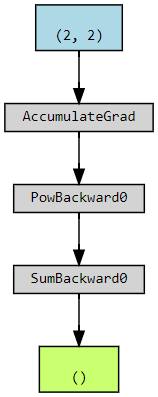

(2,2) is the shape of the input and since the output C is a single value, its dimension is ().

Ignore AccumulateGrad for now. We notice from the output before the fields ```grad_fn``` in tensors B and C. These are what are called during ```C.backwards()```

---
# Some examples

In [ ]:
A  = torch.tensor([1, 2, 3], dtype=float, requires_grad=True)

B1 = A ** 2
B2 = A ** 3

C1 = B1.sum()
C2 = B2.sum()

print(A)

print(B1, C1)

print(B2, C2)

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)
tensor([1., 4., 9.], dtype=torch.float64, grad_fn=<PowBackward0>) tensor(14., dtype=torch.float64, grad_fn=<SumBackward0>)
tensor([ 1.,  8., 27.], dtype=torch.float64, grad_fn=<PowBackward0>) tensor(36., dtype=torch.float64, grad_fn=<SumBackward0>)


In [ ]:
# These will throw an error if uncommented
# C1.backward()
# C1.backward()

In the forward pass (B1 = A ** 2, C1 = B1.sum()), pytorch stores some cache variables to be used in the backward pass. These are deleted when the first backward pass is done. This creates some errors. To tell pytorch to keep those, use 
``` retain_graph=True ```

In [ ]:
C1.backward(retain_graph=True)
print(A.grad)

C1.backward(retain_graph=True)
print(A.grad)

C1.backward(retain_graph=True)
print(A.grad)

tensor([ 8., 16., 24.], dtype=torch.float64)
tensor([10., 20., 30.], dtype=torch.float64)
tensor([12., 24., 36.], dtype=torch.float64)


We can see that on every call, [2, 4, 6] is  added to A.grad.

That is, every time a backward pass happens, A.grad accumulates.

So, we must manually reset it if we want to see the gradient of a new value (like C2)

In [ ]:
# Make A.grad zero
A.grad.zero_()

tensor([0., 0., 0.], dtype=torch.float64)

In [ ]:
C1.backward(retain_graph=True)
print(A.grad)

A.grad.zero_()

C2.backward(retain_graph=True)
print(A.grad)

tensor([14., 28., 42.], dtype=torch.float64)
tensor([ 3., 12., 27.], dtype=torch.float64)


If we do not want to compute the gradient for leaf nodes, that is possible too.

In [ ]:
A.requires_grad = False

A.grad.zero_()
C1.backward(retain_graph=True)
print(A.grad)

tensor([0., 0., 0.], dtype=torch.float64)


Since in neural networks, if gradient = 0, the parameter does not change, we can do this for parameters that we do not want to train in a network. This is called "freezing parts of a network"

tensor([0.3333, 0.3333, 0.3333], dtype=torch.float64)
tensor([0.3333, 0.3333, 0.3333], dtype=torch.float64)


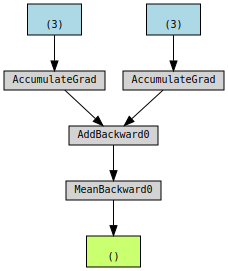

In [22]:
X1 = torch.tensor([1, 2, 3],  dtype=float, requires_grad=True)
X2 = torch.tensor([10,20,30], dtype=float, requires_grad=True)

Y  = torch.mean(X1 + X2)

Y.backward()

print(X1.grad)
print(X2.grad)

torchviz.make_dot(Y)

Sometimes, we want to do stuff with the original variable without affecting the gradient computation. For this, we use detach() which creates a copy with gradient disabled

In [26]:
print(X1)
print(X1.requires_grad)
print(X1.grad)

tensor([10.,  2.,  3.], dtype=torch.float64, requires_grad=True)
True
tensor([0.3333, 0.3333, 0.3333], dtype=torch.float64)


In [27]:
X1_detach = X1.detach()
print(X1_detach)
print(X1_detach.requires_grad)
print(X1_detach.grad)

tensor([10.,  2.,  3.], dtype=torch.float64)
False
None


In [ ]:
# This function plots the function and the gradient of the function
def plot_gradient(func, start, end):
  inp = torch.linspace(start, end, 100)
  inp.requires_grad = True
  
  out = func(inp)

  out.sum().backward()
  
  plt.plot(inp.detach().numpy(), out.detach().numpy(), label=func.__name__)
  plt.plot(inp.detach().numpy(), inp.grad.detach().numpy(), label="Gradient of %s"%(func.__name__))
  plt.legend()
  plt.show()

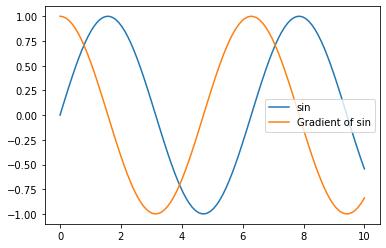

In [ ]:
plot_gradient(torch.sin, 0, 10)

---

# Example for linear regression